#Import the Telco dataset (from the spreadsheet - we are using a cleaned version of the data)

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Telco_plus.csv")


In [3]:
#CSV has 7050 rows and M(13)columns
df.shape
#matches what I expected

(7049, 13)

### Step 1 - Goals and Stuff
Primary Goal: Understand why customers churn and identify actions to minimize churn

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


#### Target variable is 'churn'

#### Initial Hypothesis:
* Churn rate will be higher for new customers
* Churn rate will be lower for customers with a larger number of partners and dependents (or a larger number of phone lines)
* Churn rate will be higher for month-to-month customers

#### MVP:
* Basic:
  * What is our churn rate and how does it compare to industry average?
  * Look at how each of these affect churn: monthly charges, contract type, gender, tenure
  * Identify one or two factors that correlate to a higher churn rate
* Advanced:
  * Analyze a combination of 2 attributes that inflence churn rate
  * Create 2-5 charts to visualize churn rate 
  * Identify discrete actions to help reduce churn rate

#### Miscellaneous details:
* Metadata: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
  * Churn is customers who left in the last month
* Telecom monthly churn rate is approximately 1.2 to 3%
  * http://www.dbmarketing.com/telecom/churnreduction.html
  * https://www.statista.com/statistics/283511/average-monthly-churn-rate-top-wireless-carriers-us/


### Step 2 - Getting to know the data - High Level

The monthly churn rate is 26.53%


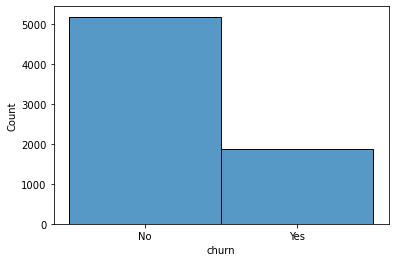

In [20]:
#Get a basic idea of churn.  ~2.5x more customers stayed than churned
sns.histplot(data=df,x='churn')
#get an actual churn rate
ch_rate = (df[df.churn=='Yes'].shape[0]/df.shape[0])
print(f'The monthly churn rate is {round(ch_rate*100,2)}%')

In [18]:
#This churn rate is significantly higher than average.

26.529999999999998

In [14]:
df.head()
#already know I want to look at gender, tenure, partner/dependents, contract type and monthly charges

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [21]:
df.info()
#most of these columns are full, but total_charges appears to have some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [35]:
#Customer acquisition cost (CAC) or subscriber acquisition cost (SAC) for telecom
#Had a lot of troubles finding this data, the best I could find was from here: https://ipcarrier.blogspot.com/2015/12/in-most-competitive-markets-low-cost.html
#Lists SAC ranging from $169 to $583 (for mobile service providers).  
#will use a more conservative value of $200 for this
#Ideally would get this info from the accounting or marketing office
sac = 200
ind_ch_rate = .03
#if 3% churn is high side of normal, how much extra $$ are we losing out on?
#monthly SAC to replace lost customers
m_SAC = ch_rate * df.shape[0] * 200 #churn rate * num customers * SAC
ind_m_SAC = 200*(ch_rate-ind_ch_rate)*df.shape[0]
print(f'Replacing churned customers costs the company ${"{:,.0f}".format(m_SAC)} a month')
print(f'This is ${"{:,.0f}".format(ind_m_SAC)} above industry average')

Replacing churned customers costs the company $374,000 a month
This is $331,706 above industry average


### Step 3 - Answer initial hypothesis questions and visualize

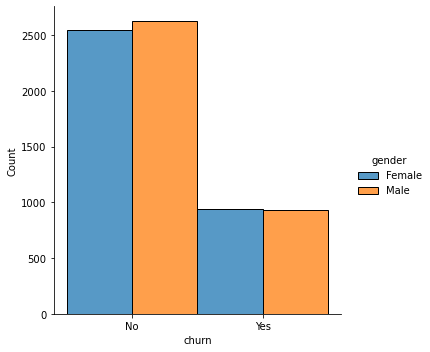

In [47]:
#gender
sns.displot(data=df,x='churn',hue='gender',multiple='dodge')

In [52]:
#tenure
#first lets get a round tenure column.  For this we will round down. (only want full months of tenure)
df['full_tenure'] = df.tenure.apply(math.floor)

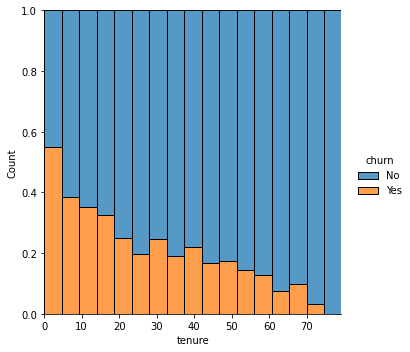

In [63]:
#tenure con't
sns.displot(data=df,x='tenure',hue='churn',multiple='fill')
#This shows us that lower tenures have a higher churn rate.
#USE

In [ ]:
#alternatively, display this as a churn rate:
#Create a new dataframe with list of months, total customers in each bucket, churn rate for each
# df_m_tenure = 

#then create relplot

In [ ]:
#contract type


In [ ]:
#monthly charges